In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


10- Classify movie reviews as positive or negative from the IMDB movie dataset of
50K movie reviews.

In [ ]:
# Load the IMDB dataset (update the path if needed)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv")

print(df.head())
print("\nShape:", df.shape)
print(df['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Shape: (50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Preprocess the Data

In [ ]:
# Convert sentiments to numeric labels
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'],
                                                    test_size=0.2, random_state=42,
                                                    stratify=df['label'])


In [ ]:
# Convert text data into numerical features
#Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Train a Naive Bayes Classifier

In [ ]:
# # Train a Multinomial Naive Bayes model
# model = MultinomialNB()
# model.fit(X_train_tfidf, y_train)
# Logistic Regression classifier (better for SHAP/LIME)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Evaluate the Model

✅ Accuracy: 0.8898

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



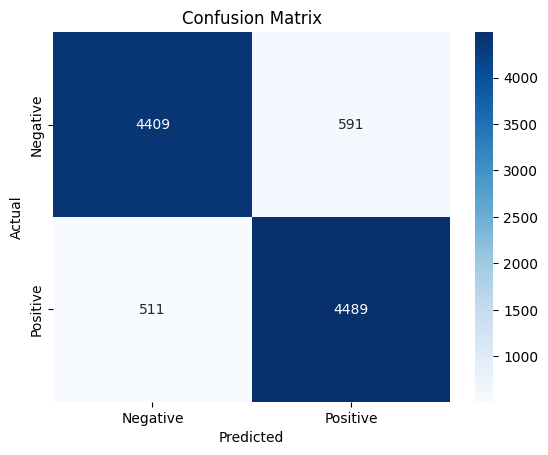

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluation metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Test on New Reviews

In [ ]:
sample_reviews = [
    "This movie was absolutely fantastic! Great performances.",
    "It was boring and way too long. I nearly fell asleep."
]

sample_tfidf = vectorizer.transform(sample_reviews)
predictions = model.predict(sample_tfidf)

for review, label in zip(sample_reviews, predictions):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"Review: {review}\n→ Predicted Sentiment: {sentiment}\n")


Review: This movie was absolutely fantastic! Great performances.
→ Predicted Sentiment: Positive

Review: It was boring and way too long. I nearly fell asleep.
→ Predicted Sentiment: Negative



Practical 11. Build and train a text classifier for the given data (using textbob or
simpletransformers library)

In [ ]:
!pip install textblob
from textblob import TextBlob

# Example reviews
reviews = [
    "I absolutely loved this movie!",
    "The plot was dull and predictable.",
    "Fantastic performance by the lead actor.",
    "Terrible direction and poor editing."
]

In [ ]:
for text in reviews:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    print(f"Review: {text}")
    print(f"Sentiment Score: {sentiment:.2f} → {'Positive' if sentiment > 0 else 'Negative'}\n")

Review: I absolutely loved this movie!
Sentiment Score: 0.88 → Positive

Review: The plot was dull and predictable.
Sentiment Score: -0.25 → Negative

Review: Fantastic performance by the lead actor.
Sentiment Score: 0.40 → Positive

Review: Terrible direction and poor editing.
Sentiment Score: -0.70 → Negative



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dummy_text_data.csv")
# Columns expected: "text", "label"

# Convert into tuple format required for TextBlob
dataset = [(row["text"], row["label"]) for index, row in df.iterrows()]

# 2. Train–test split
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# 3. Train Naive Bayes model
classifier = NaiveBayesClassifier(train_data)

# 4. Evaluate accuracy
accuracy = classifier.accuracy(test_data)
print("Accuracy:", accuracy)

# 5. Example prediction
print(classifier.classify("This product is amazing"))


Accuracy: 0.75
1


In [ ]:
!pip install simpletransformers
!pip install transformers datasets sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 134.2 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=2b7f87f99be3354d384a49655ffce57f3f61c9db65ca4c5e11c1538bc31f3306
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dummy_text_data.csv")
# Columns expected: "text" and "label" (label should be numeric: 0,1,2,...)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 2. Define model args
model_args = ClassificationArgs()
model_args.num_train_epochs = 3
model_args.learning_rate = 3e-5
model_args.train_batch_size = 8
model_args.eval_batch_size = 8
model_args.overwrite_output_dir = True

# 3. Create BERT model
model = ClassificationModel(
    "bert",
    "bert-base-uncased",
    args=model_args,
    num_labels=len(df.label.unique()),
)






Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 4. Train the model
model.train_model(train_df)

# 5. Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test_df)
print(result)

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:637: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:924: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:950: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:1518: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

{'mcc': 0.0, 'accuracy': 0.25, 'f1_score': 0.2, 'tp': np.int64(1), 'tn': np.int64(0), 'fp': np.int64(3), 'fn': np.int64(0), 'auroc': np.float64(1.0), 'auprc': np.float64(1.0), 'eval_loss': 0.7969970703125}


/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:1570: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [ ]:
# 6. Make predictions
predictions, raw_outputs = model.predict([
    "This is a great product!",
    "I hate this so much."
])

print(predictions)

0it [00:00, ?it/s]

Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

[1 1]


/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:2260: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [ ]:
result



{'mcc': 0.0,
 'accuracy': 0.25,
 'f1_score': 0.2,
 'tp': np.int64(1),
 'tn': np.int64(0),
 'fp': np.int64(3),
 'fn': np.int64(0),
 'auroc': np.float64(1.0),
 'auprc': np.float64(1.0),
 'eval_loss': 0.7969970703125}

In [ ]:
model_outputs


array([[-0.4777832 ,  0.25463867],
       [-0.53417969,  0.15063477],
       [-0.25830078,  0.0581665 ],
       [ 0.00974274,  0.28222656]])

In [ ]:
wrong_predictions


[{'guid': 1, 'text_a': 'Totally waste of money, do not buy!', 'text_b': None, 'label': 0},
 {'guid': 2, 'text_a': 'The worst product I’ve ever bought.', 'text_b': None, 'label': 0},
 {'guid': 3, 'text_a': 'This is the worst experience I have ever had.', 'text_b': None, 'label': 0}]

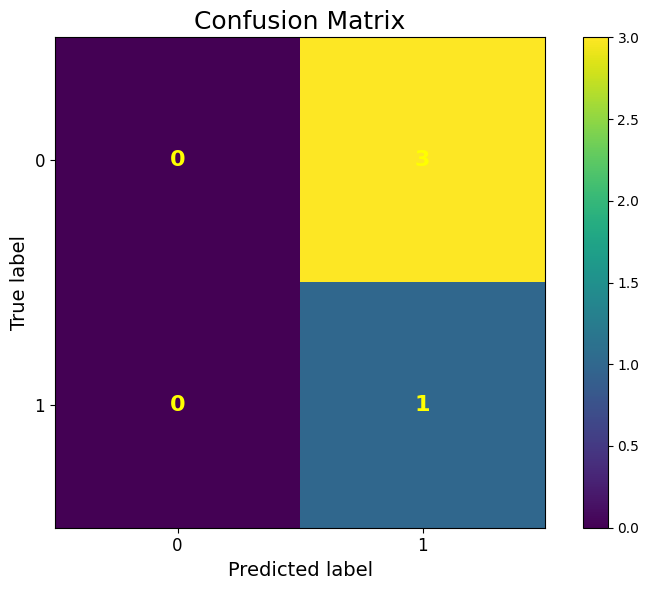

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example true & predicted labels
y_true = np.array([0, 0, 0, 1])
y_pred = np.array([1, 1, 1, 1])

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap-style confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title("Confusion Matrix", fontsize=18)
plt.colorbar()

# Tick marks
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1], fontsize=12)
plt.yticks(tick_marks, [0, 1], fontsize=12)

# Labels
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)

# Add numbers to the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, str(cm[i, j]),
            ha="center", va="center",
            color="yellow", fontsize=16, fontweight="bold"
        )

plt.grid(False)
plt.tight_layout()
plt.show()



=== Evaluation Report ===
accuracy: 0.5
f1_score: 0.6666666666666666
mcc: 0.0
tp: 2
tn: 0
fp: 2
fn: 0
auroc: 1.0
auprc: 1.0
eval_loss: 0.27420909977100133


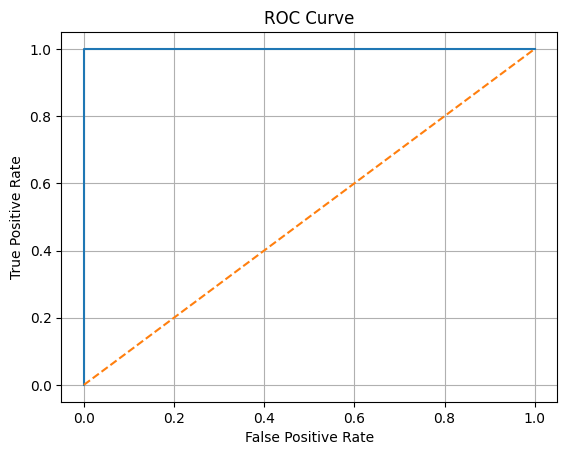

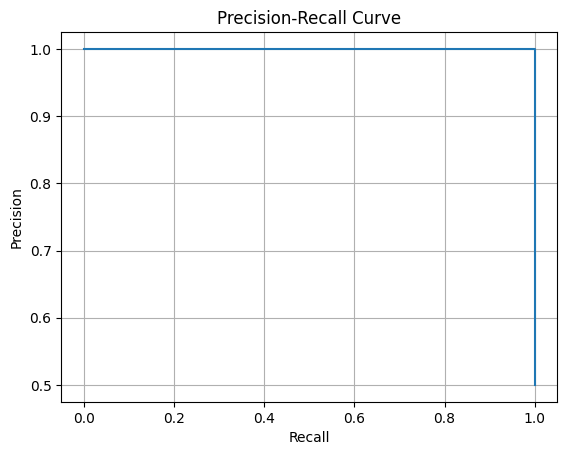

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, matthews_corrcoef,
    roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt


def evaluate_model(model_outputs, y_true):
    """
    model_outputs: np.array (N,2) logits/probabilities
    y_true: list/array of true labels
    """

    logits = model_outputs[:, 1]           # score for class 1
    y_pred = (logits > 0).astype(int)      # convert to predictions

    # ---- Metrics ----
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    auroc = roc_auc_score(y_true, logits)
    auprc = average_precision_score(y_true, logits)

    eval_loss = np.mean((y_true - logits) ** 2)

    result = {
        "accuracy": accuracy,
        "f1_score": f1,
        "mcc": mcc,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "auroc": auroc,
        "auprc": auprc,
        "eval_loss": eval_loss
    }

    return result, logits, y_pred


def plot_curves(y_true, logits):
    # ----- ROC Curve -----
    fpr, tpr, _ = roc_curve(y_true, logits)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.grid(True)
    plt.show()

    # ----- Precision-Recall Curve -----
    precision, recall, _ = precision_recall_curve(y_true, logits)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.show()


# -------------------- RUN EVERYTHING --------------------

# 1. Your model outputs (logits)
model_outputs = np.array([
    [-0.4777832 ,  0.25463867],
    [-0.53417969,  0.15063477],
    [-0.25830078,  0.05816650],
    [ 0.00974274,  0.28222656]
])

# 2. Your true labels (must come from your dataset)
# Example: update these based on your own test_df
y_true = np.array([1, 0, 0, 1])

# 3. Evaluate
result, logits, y_pred = evaluate_model(model_outputs, y_true)

# 4. Print the final evaluation report
print("\n=== Evaluation Report ===")
for k, v in result.items():
    print(f"{k}: {v}")

# 5. Plot graphs
plot_curves(y_true, logits)


Practical 12. Generate text using a character-based RNN using an appropriate dataset. Given a
sequence of characters from a given data (eg "Shakespear"), train a model to predict
the next character in the sequence ("e").

In [ ]:

!pip install tensorflow numpy


In [ ]:
import tensorflow as tf
import numpy as np

# Load text data
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
text = open(path_to_file, 'r').read()

print(f"Length of text: {len(text)} characters")
print(text[:500])  # print first 500 chars


Length of text: 1115394 characters
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


Create Character Mapping

In [ ]:
# Unique characters in the text
vocab = sorted(set(text))
vocab_size = len(vocab)
print(f"Unique characters: {vocab_size}")

# Mapping from chars to indices
char2idx = {c:i for i, c in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert entire text to indices
text_as_int = np.array([char2idx[c] for c in text])


Unique characters: 65


Prepare Training Sequences

In [ ]:
seq_length = 50
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]  # first 100 chars
    target_text = chunk[1:]  # next 100 chars
    return input_text, target_text

dataset = sequences.map(split_input_target)


Create Batches and Shuffle

In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 10000
text = text[:100000]

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


Build the Character RNN Model

In [ ]:
vocab_size = len(vocab)
embedding_dim = 128
rnn_units = 256

model = tf.keras.Sequential([
    # Embedding layer
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),

    # LSTM layer (stateful=False for simplicity)
    tf.keras.layers.LSTM(rnn_units, return_sequences=True),

    # Output Dense layer
    tf.keras.layers.Dense(vocab_size)
])



Define Loss Function

In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)


Train the Model

In [ ]:
EPOCHS = 2

history = model.fit(dataset, epochs=EPOCHS)


Epoch 1/2
683/683 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.6984
Epoch 2/2
683/683 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 1.8740


Generate Text

In [ ]:
def generate_text(model, start_string, num_generate=500):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 1.0  # randomness of predictions

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        # Only take the last timestep's prediction
        predictions = predictions[-1]

        # Apply temperature
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(tf.expand_dims(predictions, 0), num_samples=1)[0,0].numpy()

        # Add predicted character
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Example
print(generate_text(model, start_string="Shakespear"))


Shakespeardotin-RF wl.
D gnze.
Imes sg d
Co,
Q-hpm'Th ty, lLBPit d:
Ed m t ithous ardcke thatofAnan:
BEHorl is
Torouif oconowelw'cherd s'rfaththa h m Litom, t f fens cd E
Prlovlantoveg D t f!-ds t, teiealifom!Fan wpy balixbeccrot w
K mowouro cr a, tathanghes hayoures ho n ho y beeaca ha s, merace VLUClead tithine nde tro ee ifin y n
Cprllea nd winth t th aun.
Tus ty thowathispe os o bey ps I y an h f ck t ps ofewhadaRI:
Dpr,
Th dferofet thithar;
I'ersthe I tu a py, EN$LAULe berocted wAmas me, Boe t norery
